#Semester assignment

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec

Boundary conditions:
\begin{equation}
    V(x = 0, y) = 0, \\
    V(x = L, y) = 0, \\
    V(x, y = 0) = 0, \\
    V(x, y = L) = V_0 (x)
\end{equation}

Solving Laplace equation ($\nabla^2 V = 0$) with these boundary condition gives:

\begin{align}
    V(x, y) =& \sum_{n=1}^{\infty} c_n \text{sinh}(n \pi \xi_y ) \text{sin}(n  \pi \xi_x),\\
    c_n =& \frac{2}{\text{sinh}(n \pi)} \int_0^1 \text{d} \xi_x V_0 (\xi_x L) \text{sin}(n \pi \xi_x),
\end{align}

where $\xi_x = x/L$ and $\xi_y = y/L$ are dimensionless variables.

In [32]:
def c_n(x, V_0, n):
    '''Returns the fourier coefficient nr. n'''
    dx = L/N
    integral = np.sum(V_0 * np.sin(n*np.pi*x), axis=1) * dx
    return 2 * integral / np.sinh(n*np.pi) 


def potential(x, y, V_0, n):
    '''Calculates the potential given by V_0(x)'''
    V = np.zeros_like(x)
    for i in range(1, n):
        ci = c_n(x, V_0, i)
        V += ci*np.sinh(i*np.pi*y)*np.sin(i*np.pi*x)
    return V


def pot_1(x, m=1):
    return 100 * np.sin(m*np.pi*x)


def pot_2(x):
    return 100 * (1 - (x - 0.5)**4)

In [33]:
start = 0
L = 1
N = 1000

x = np.linspace(0, L, N)
y = np.linspace(0, L, N)

xx, yy = np.meshgrid(x, y)

V_0 = pot_1(x)

V = potential(xx, yy, V_0, 50)      # V[y,x]

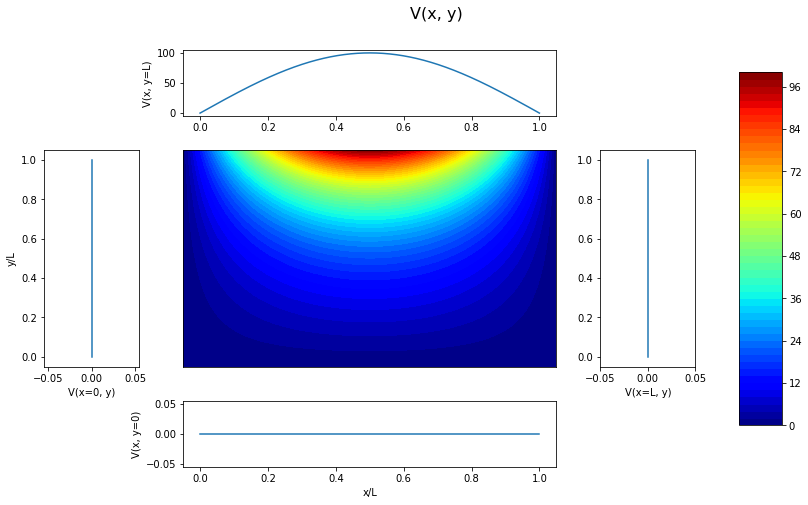

In [71]:
'''#Plot of V_0(x)
plt.figure("V_0", figsize=(12, 2))
plt.plot(x, V_0)
plt.xlabel("x/L")
plt.ylabel("V_0(x)")
plt.show()'''

#Plotting a colormap of the potential V(x, y) with the edge potentials
fig = plt.figure("V(x,y)", figsize=(12,7))

gs = gridspec.GridSpec(10, 5, figure=fig)

plt.subplot(gs.new_subplotspec((1, 1), colspan=3, rowspan=2))        # V(x, y=L), should be similar to V_0(x)
plt.plot(x, V[len(y)-1,:], label="V(x, y=L)")
#plt.xlabel("x/L")
plt.ylabel(f"V(x, y=L)")

plt.subplot(gs.new_subplotspec((3, 0), rowspan=5))        # V(x=0, y), should be 0
plt.plot(V[:,0], y, label="V(x = 0, y)")
plt.ylabel("y/L")
plt.xlabel(f"V(x=0, y)")

ax = plt.subplot(gs.new_subplotspec((3, 1), colspan=3, rowspan=5))        # Color plot of the potential
# Set colour interpolation and colour map
colorinterpolation = 50
colourMap = plt.cm.jet #you can try: colourMap = plt.cm.coolwarm
# Configure the contour
im = plt.contourf(xx, yy, V, colorinterpolation, cmap=colourMap)
ax.axes.get_xaxis().set_visible(False) 
ax.axes.get_yaxis().set_visible(False) 
  
#plt.xlabel("x/L")
#plt.ylabel("y/L")

plt.subplot(gs.new_subplotspec((3, 4), rowspan=5))       # V(x=L, y), should be 0
plt.plot(V[:,-1], y, label="V(x=L, y)")
#plt.ylabel("y/L")
plt.xlim(-0.05, 0.05)
plt.xlabel(f"V(x=L, y)")

plt.subplot(gs.new_subplotspec((8, 1), colspan=3, rowspan=2))       # V(x, y=0), should be 0
plt.plot(x, V[0,:], label="V(x, y=0)")
plt.xlabel("x/L")
plt.ylabel(f"V(x, y=0)")

fig.suptitle('V(x, y)', fontsize=16)

plt.tight_layout(pad=0.3, w_pad=0.3, h_pad=0.3)

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
fig.colorbar(im, cax=cbar_ax)

# Show the result in the plot window
plt.savefig("pot.png")
plt.show()